In this assignment students will build the random forest model after
normalizing the variable to house pricing from boston data set.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import r2_score

In [2]:
#boston.data returns an array with the feature values
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns= boston.feature_names)
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df["PRICE"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### We have a Regression Problem.

In [7]:
# There are no missing values.
df.isna().sum().values.any()

False

D:\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


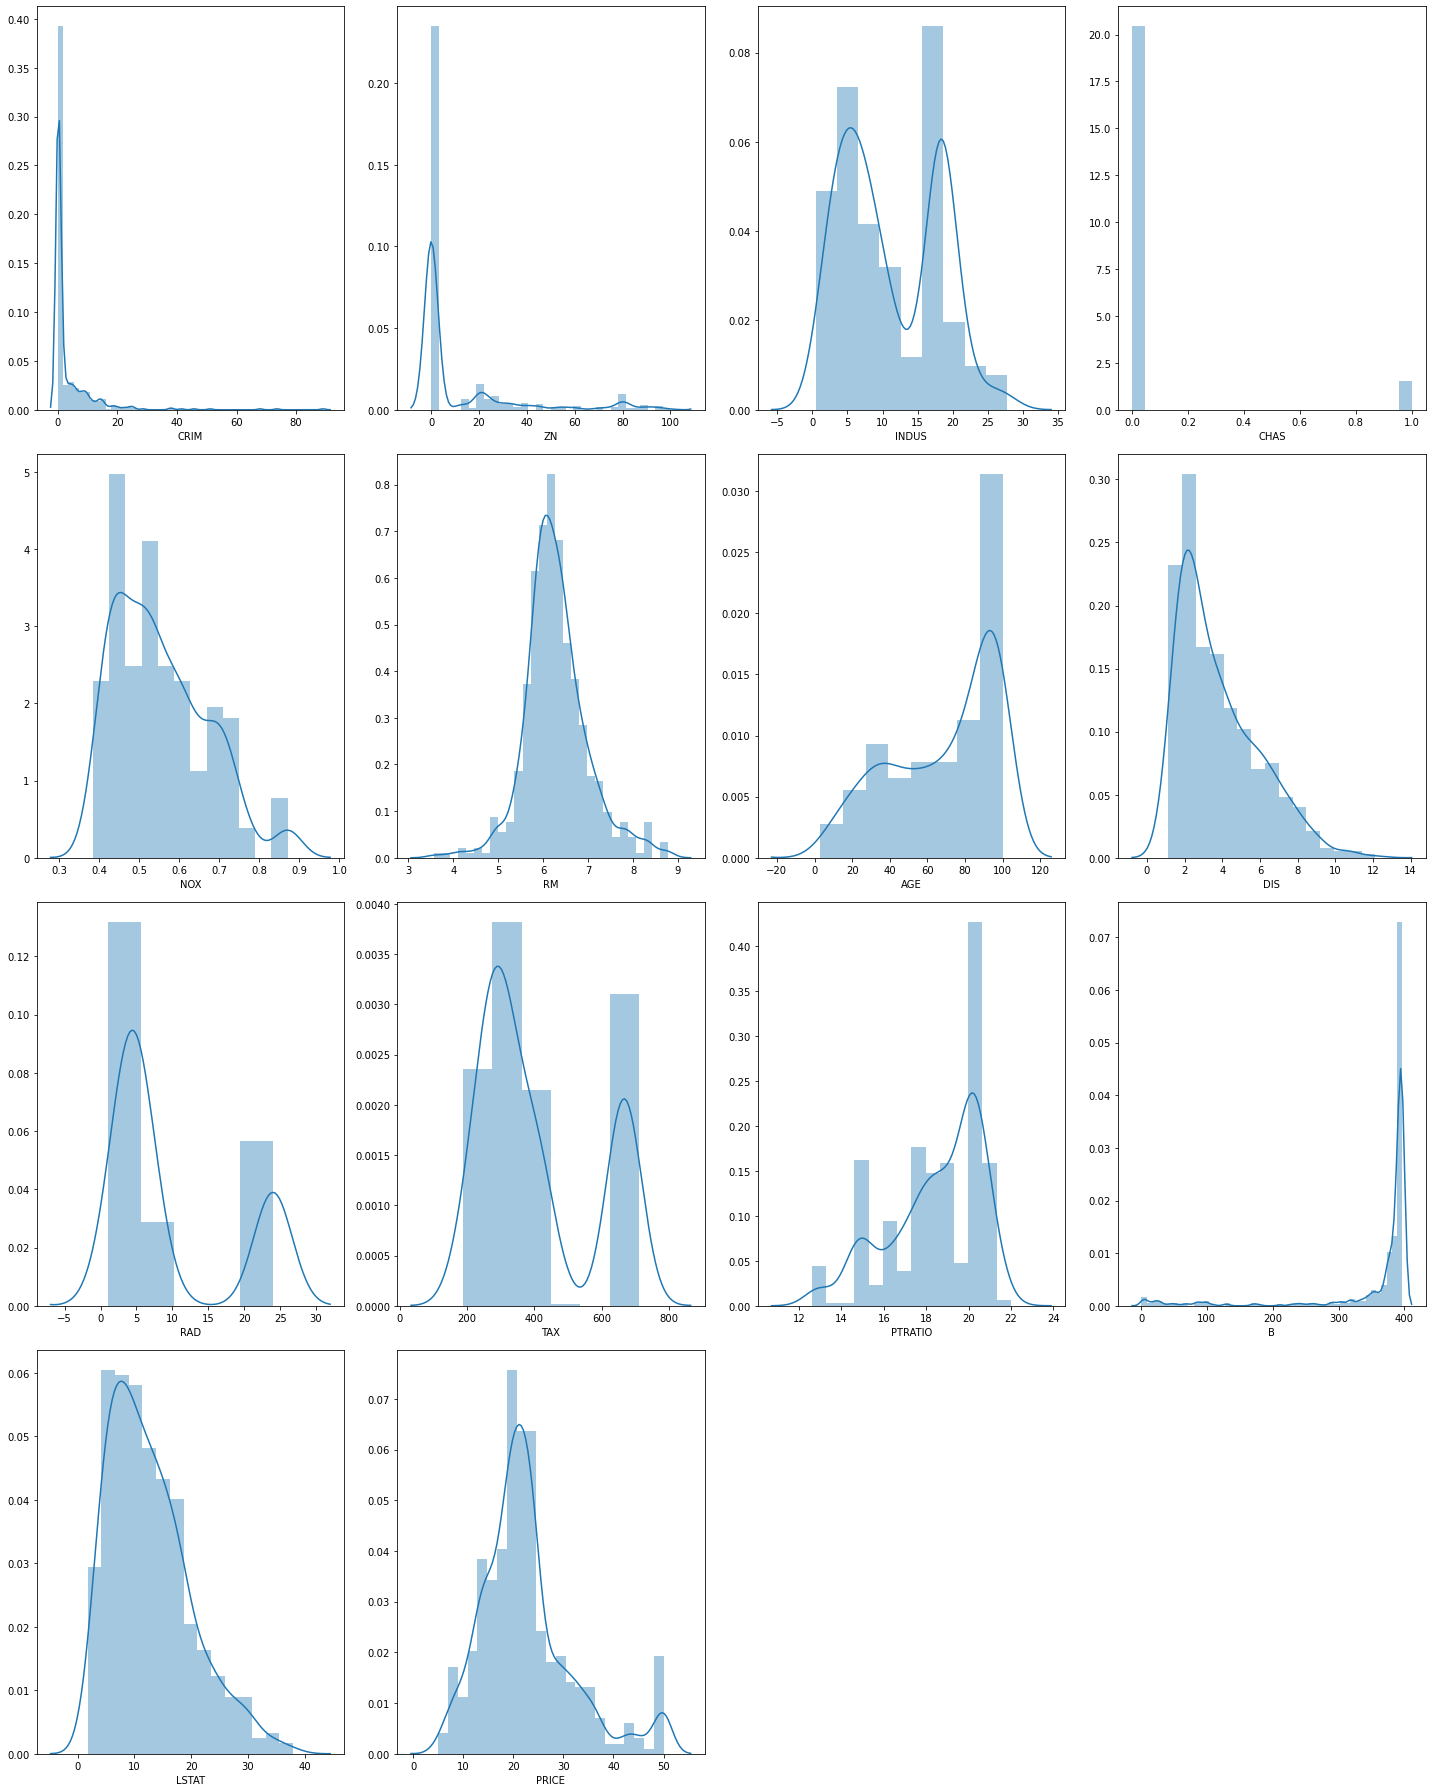

In [8]:
# Show distribution of each feature
plt.figure(figsize=(20,25), facecolor="white")
nr_plot = 1

for col in df.columns:
    if(nr_plot <= 16):
        ax = plt.subplot(4,4, nr_plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        nr_plot += 1
    
plt.tight_layout()

In [9]:
l = df[df["ZN"] == 0.0]
print("% of 0s in ZN : ", len(l) / len(df) * 100)

% of 0s in ZN :  73.51778656126481


In [10]:
# As we see from the distribution, around 73% of values are 0, so it would be reasonable to replace zeros with the
# mean of the column in order to maintain the normal distribution
df["ZN"] = df["ZN"].replace(0, df['ZN'].mean())

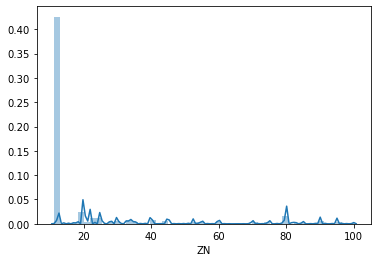

In [11]:
sns.distplot(df["ZN"])

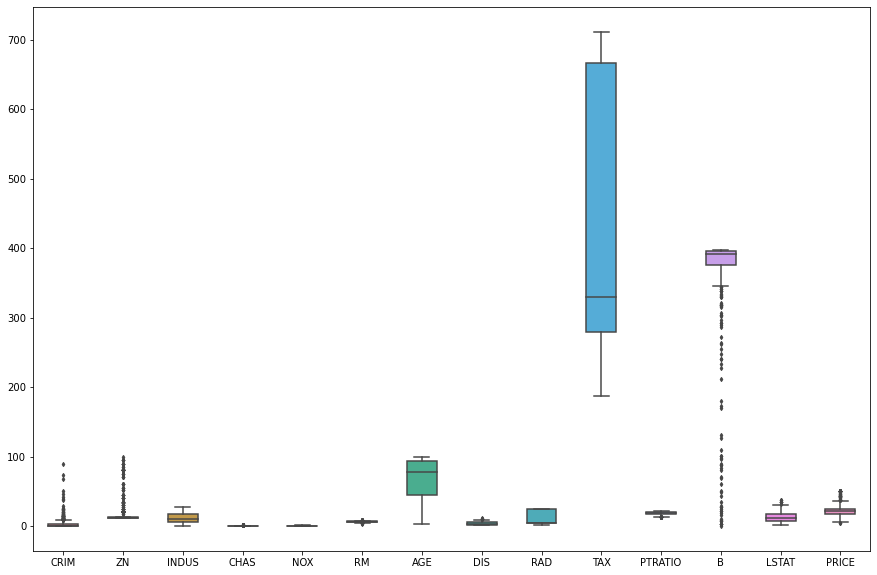

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [13]:
# Handling outliers

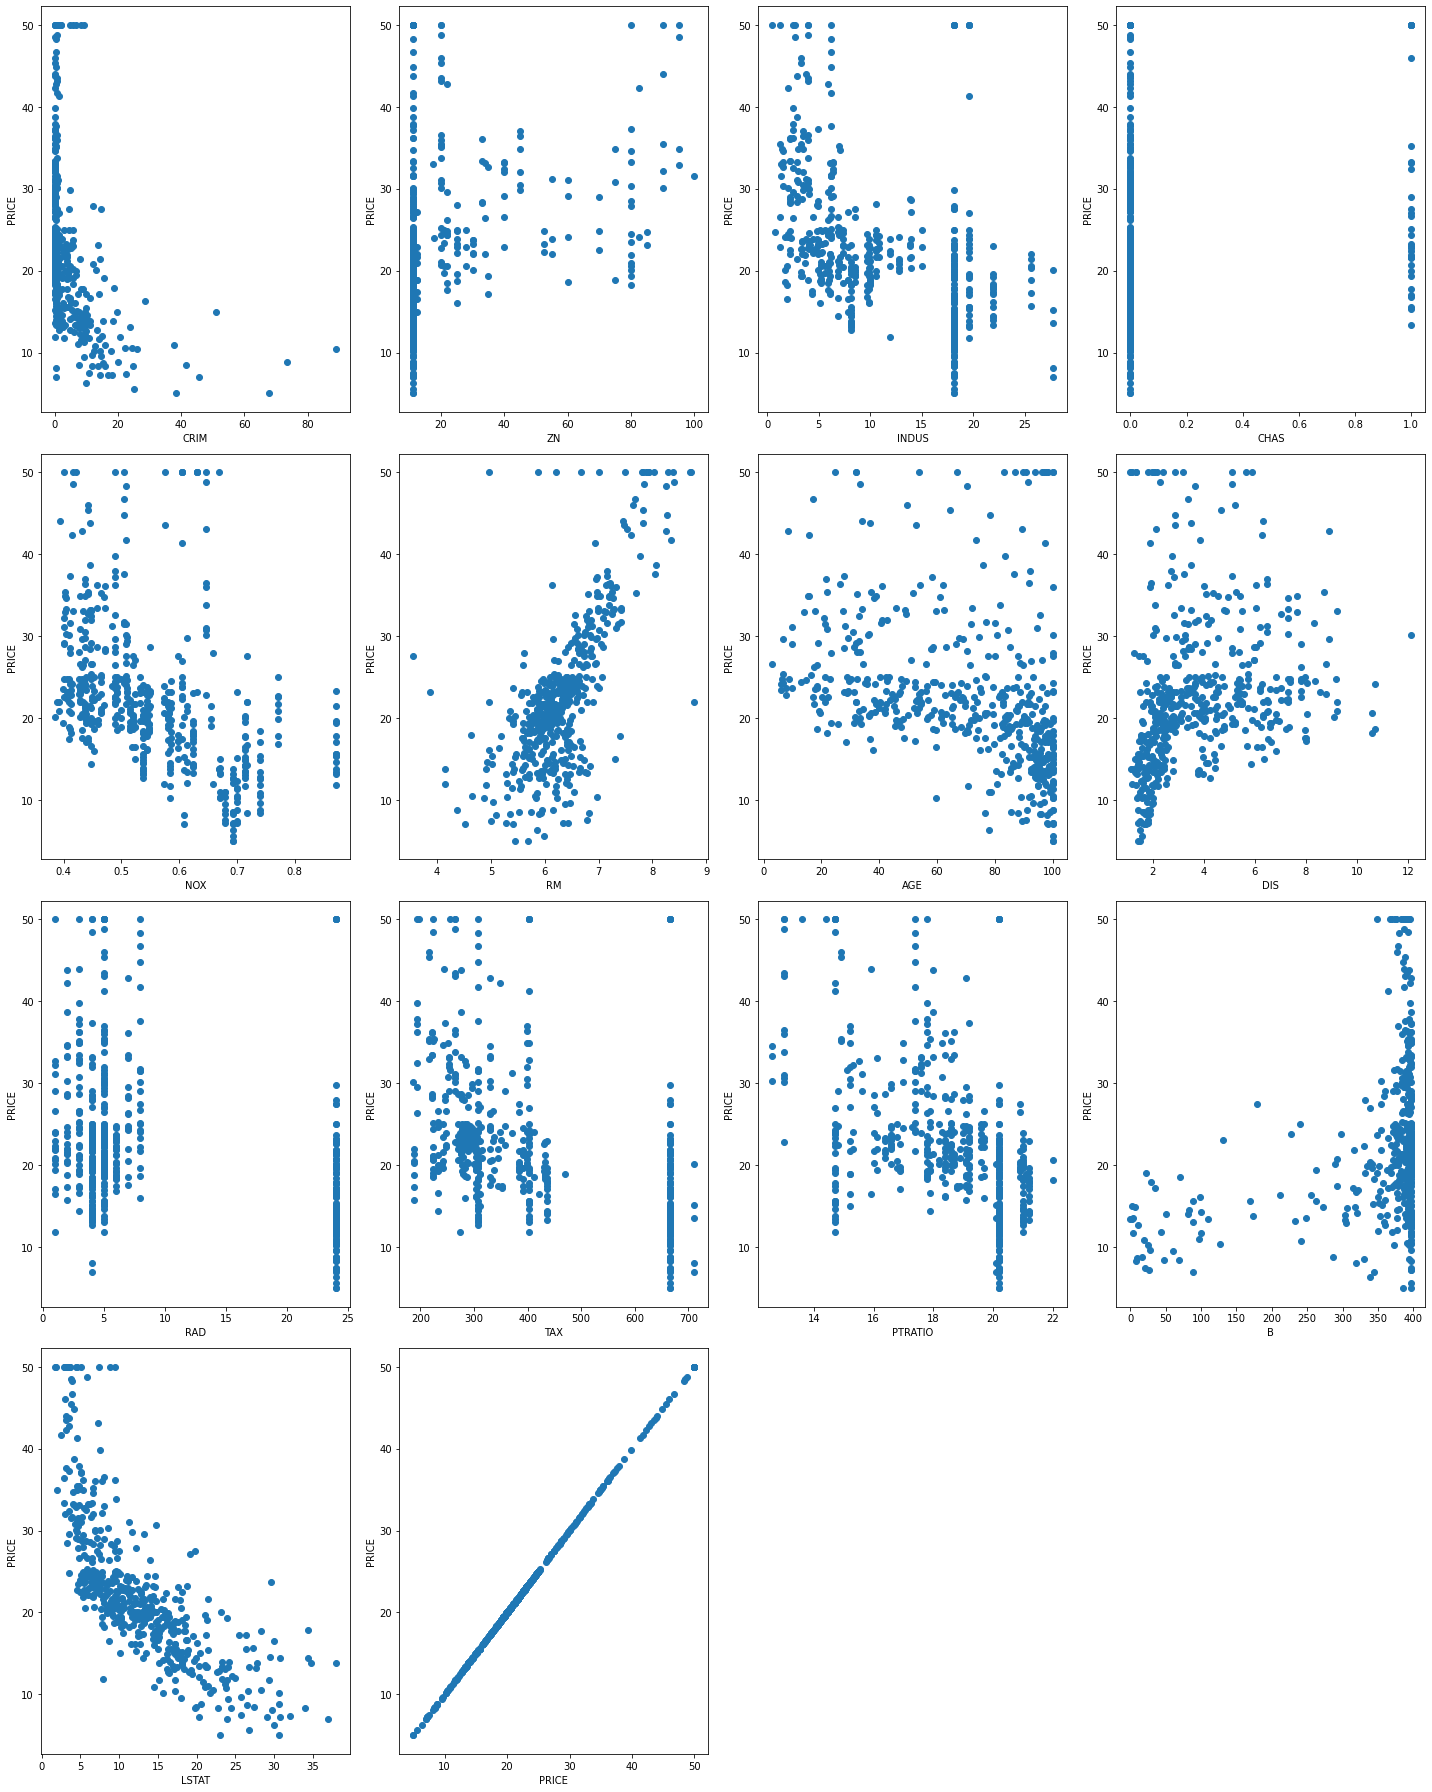

In [14]:
# Show relationship of each feature with the label PRICE
plt.figure(figsize=(20,25), facecolor="white")
nr_plot = 1

for col in df.columns:
    if(nr_plot <= 16):
        ax = plt.subplot(4,4, nr_plot)
        plt.scatter(df[col], df["PRICE"])
        plt.xlabel(col)
        plt.ylabel("PRICE")
        nr_plot += 1
    
plt.tight_layout()

In [15]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=45)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_train

# VIF for RAD and TAX is higher than 0.5 so there is multicolleniarity

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.733782,CRIM
1,2.061976,ZN
2,3.771471,INDUS
3,1.094001,CHAS
4,4.402151,NOX
5,1.872327,RM
6,3.226334,AGE
7,3.781473,DIS
8,7.577998,RAD
9,8.840406,TAX


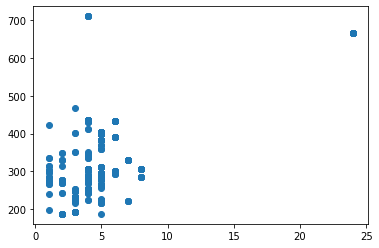

In [19]:
# There is a strong positive relationship between RAD and TAX

plt.scatter(x=df["RAD"], y=df["TAX"])

In [20]:
# The relationship between TAX and RAD is positive and strong

df.corr()["TAX"]["RAD"]

0.9102281885331822

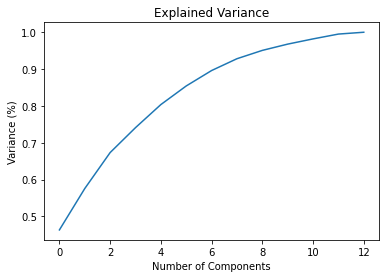

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [22]:
# WE use PCA to handle the multicolleniarity. We choose the nr of components to be 10 which explaines around 95% of data.
# When applying PCA, the accuracy is not going to increase. 

pca = PCA(n_components=7)
x_train = pca.fit_transform(x_train)

In [23]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [24]:
# Model Accuracy on TRAINIG SET

r2_train = model.score(x_train, y_train)
print("R2 in TRAINING SET : ", r2_train)

pred_train = model.predict(x_train)
adjr2_train = r2_score(y_train, pred_train)
print("Adjusted R2 in TRAINING SET : ", adjr2_train)

R2 in TRAINING SET :  0.9616600094547987
Adjusted R2 in TRAINING SET :  0.9616600094547987


In [25]:
# Model Accuracy on TEST SET

x_test = scaler.transform(x_test)
x_test = pca.transform(x_test)

In [26]:
r2_test = model.score(x_test, y_test)
print("R2 in TEST SET : ", r2_test)

pred_test = model.predict(x_test)
adj_r2_test = r2_score(y_test, pred_test)
print("Adj R2 in TEST SET : ", adj_r2_test)

R2 in TEST SET :  0.8375880892566647
Adj R2 in TEST SET :  0.8375880892566647


In [27]:
grid_param = { 
            "n_estimators"      : [10,20,30,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [29]:
grid_search = GridSearchCV(estimator=RandomForestRegressor() , param_grid=grid_param, cv=5, n_jobs =-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30, 50, 100]})

In [30]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 50}

In [31]:
new_model = RandomForestRegressor(max_features='log2', bootstrap=False, min_samples_split=4, n_estimators=50, random_state=1)
new_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=50, random_state=1)

In [32]:
# Model Accuracy on TRAINIG SET

r2_train = new_model.score(x_train, y_train)
print("R2 in TRAINING SET : ", r2_train)

pred_train = new_model.predict(x_train)
adjr2_train = r2_score(y_train, pred_train)
print("Adjusted R2 in TRAINING SET : ", adjr2_train)

R2 in TRAINING SET :  0.993092187908512
Adjusted R2 in TRAINING SET :  0.993092187908512


In [33]:
# Model Accuracy on TEST SET

r2_test = new_model.score(x_test, y_test)
print("R2 in TEST SET : ", r2_test)

pred_test = new_model.predict(x_test)
adj_r2_test = r2_score(y_test, pred_test)
print("Adj R2 in TEST SET : ", adj_r2_test)

R2 in TEST SET :  0.8388512089138342
Adj R2 in TEST SET :  0.8388512089138342


In [34]:
import pickle
f1 = open("random_forest.pickle", "wb")
pickle.dump(new_model, f1)

f2 = open("scaler.pickle", "wb")
pickle.dump(scaler, f2)

f3 = open("pca.pickle", "wb")
pickle.dump(pca, f3)